In [1]:
!pip install --upgrade scikit-learn



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix
import nltk
nltk.download('stopwords')

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df1=pd.read_csv('negup1.csv')



In [4]:
df2=pd.read_csv('positive4.csv')

In [5]:
df = pd.concat([df1, df2], ignore_index=True)

In [6]:
df

,labels,reviews
0,0,"किन, किन, सूत्र किन फेर्ने ?!!! म यो वर्ष देखि..."
1,0,मैले यो उत्पादन वर्षौंको लागि प्रयोग गरेको छु ...
2,0,यो उत्पादन एक वर्ष भन्दा बढीको लागि प्रयोग गर्...
3,0,"म यो उत्पादन द्वारा कसम खान्थे, तर मैले गरेको ..."
4,0,धेरै नराम्रो गन्ध छ। मैले केहि प्रयोगहरूको लाग...
...,...,...
65531,1,यो उत्पादन धेरै राम्रो काम गर्दछ। मैले दोस्रो ...
65532,1,मैले यो उत्पादन Pinchme बाट नि: शुल्क नमूनाको ...
65533,1,यसले मेरो छालालाई पूर्ण रेशम जस्तो महसुस गराउन...
65534,1,प्रयास गर्न 3 दैनिक नमूनाहरू प्राप्त गरे र प्र...


In [7]:
df.to_csv('nepali_r.csv')

In [8]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
df

,labels,reviews
0,1,मैले पिन्चमेबाट नि:शुल्क नमूना पाएँ र विश्वास ...
1,1,म यो उत्पादन धेरै माया गर्छु। मैले पहिले डायरब...
2,0,"म सामान्यतया समीक्षाहरू लेख्दिन, र मलाई आशा थि..."
3,1,"म यो उत्पादन प्रयास गर्न धेरै उत्साहित थिएँ, त..."
4,1,यो अब मेरो आँखा क्रीम मा जाने हो। मसँग वंशानुग...
...,...,...
65531,1,मेरी छोरीले यो उत्पादन मन पराउनुभयो! उनीसँग धे...
65532,1,मैले यो उत्पादन इन्फ्लुएन्स्टर मार्फत प्राप्त ...
65533,0,यसले मलाई तोड्यो :( मैले यो तीन ताराहरू अझै पन...
65534,0,उत्पादन राम्रो थियो - बनावट राम्रो लाग्यो र गन...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65536 entries, 0 to 65535
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   65536 non-null  int64 
 1   reviews  65403 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [11]:
df.describe()

,labels
count,65536.000000
mean,0.551117
std,0.497384
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [12]:
df.dropna()

,labels,reviews
0,1,मैले पिन्चमेबाट नि:शुल्क नमूना पाएँ र विश्वास ...
1,1,म यो उत्पादन धेरै माया गर्छु। मैले पहिले डायरब...
2,0,"म सामान्यतया समीक्षाहरू लेख्दिन, र मलाई आशा थि..."
3,1,"म यो उत्पादन प्रयास गर्न धेरै उत्साहित थिएँ, त..."
4,1,यो अब मेरो आँखा क्रीम मा जाने हो। मसँग वंशानुग...
...,...,...
65531,1,मेरी छोरीले यो उत्पादन मन पराउनुभयो! उनीसँग धे...
65532,1,मैले यो उत्पादन इन्फ्लुएन्स्टर मार्फत प्राप्त ...
65533,0,यसले मलाई तोड्यो :( मैले यो तीन ताराहरू अझै पन...
65534,0,उत्पादन राम्रो थियो - बनावट राम्रो लाग्यो र गन...


In [13]:
df.groupby('labels').count()

,reviews
labels,
0,29382
1,36021


In [14]:

# Assuming your DataFrame is called 'df'
missing_reviews = df[df['reviews'].isnull()]

# Display rows with missing 'reviews'
print(missing_reviews)

       labels reviews
205         1     NaN
1343        0     NaN
1676        1     NaN
3352        0     NaN
3498        0     NaN
...       ...     ...
62630       1     NaN
62686       1     NaN
63555       0     NaN
63982       1     NaN
64896       1     NaN

[133 rows x 2 columns]


In [15]:
df.isna().sum()

labels       0
reviews    133
dtype: int64

In [16]:
# Modify the existing DataFrame in-place
df.dropna(subset=['reviews'], inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65403 entries, 0 to 65535
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   65403 non-null  int64 
 1   reviews  65403 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [18]:
# Make new column in df named length and put length of text as its values.
df['Length'] = df['reviews'].apply(len)
df

,labels,reviews,Length
0,1,मैले पिन्चमेबाट नि:शुल्क नमूना पाएँ र विश्वास ...,262
1,1,म यो उत्पादन धेरै माया गर्छु। मैले पहिले डायरब...,441
2,0,"म सामान्यतया समीक्षाहरू लेख्दिन, र मलाई आशा थि...",276
3,1,"म यो उत्पादन प्रयास गर्न धेरै उत्साहित थिएँ, त...",276
4,1,यो अब मेरो आँखा क्रीम मा जाने हो। मसँग वंशानुग...,207
...,...,...,...
65531,1,मेरी छोरीले यो उत्पादन मन पराउनुभयो! उनीसँग धे...,114
65532,1,मैले यो उत्पादन इन्फ्लुएन्स्टर मार्फत प्राप्त ...,244
65533,0,यसले मलाई तोड्यो :( मैले यो तीन ताराहरू अझै पन...,226
65534,0,उत्पादन राम्रो थियो - बनावट राम्रो लाग्यो र गन...,240


**Text Cleaning


In [19]:
import string
from nltk.corpus import stopwords
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('nepali')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['छ',
 'र',
 'पनि',
 'छन्',
 'लागि',
 'भएको',
 'गरेको',
 'भने',
 'गर्न',
 'गर्ने',
 'हो',
 'तथा',
 'यो',
 'रहेको',
 'उनले',
 'थियो',
 'हुने',
 'गरेका',
 'थिए',
 'गर्दै',
 'तर',
 'नै',
 'को',
 'मा',
 'हुन्',
 'भन्ने',
 'हुन',
 'गरी',
 'त',
 'हुन्छ',
 'अब',
 'के',
 'रहेका',
 'गरेर',
 'छैन',
 'दिए',
 'भए',
 'यस',
 'ले',
 'गर्नु',
 'औं',
 'सो',
 'त्यो',
 'कि',
 'जुन',
 'यी',
 'का',
 'गरि',
 'ती',
 'न',
 'छु',
 'छौं',
 'लाई',
 'नि',
 'उप',
 'अक्सर',
 'आदि',
 'कसरी',
 'क्रमशः',
 'चाले',
 'अगाडी',
 'अझै',
 'अनुसार',
 'अन्तर्गत',
 'अन्य',
 'अन्यत्र',
 'अन्यथा',
 'अरु',
 'अरुलाई',
 'अर्को',
 'अर्थात',
 'अर्थात्',
 'अलग',
 'आए',
 'आजको',
 'ओठ',
 'आत्म',
 'आफू',
 'आफूलाई',
 'आफ्नै',
 'आफ्नो',
 'आयो',
 'उदाहरण',
 'उनको',
 'उहालाई',
 'एउटै',
 'एक',
 'एकदम',
 'कतै',
 'कम से कम',
 'कसै',
 'कसैले',
 'कहाँबाट',
 'कहिलेकाहीं',
 'का',
 'किन',
 'किनभने',
 'कुनै',
 'कुरा',
 'कृपया',
 'केही',
 'कोही',
 'गए',
 'गरौं',
 'गर्छ',
 'गर्छु',
 'गर्नुपर्छ',
 'गयौ',
 'गैर',
 'चार',
 'चाहनुहुन्छ',
 'चाहन्छु',
 'चाहिए

Create function to remove all punctuation,remove stopwords and return a list of cleaned text


In [21]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word not in stopwords.words('nepali')]

Vectorization

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
# text to numerical value
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['reviews'])
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x0000016F26E5B920>)

In [23]:
bow_transformer.vocabulary_

{'मैले': 38049,
 'पिन्चमेबाट': 28745,
 'निशुल्क': 26584,
 'नमूना': 25800,
 'पाएँ': 28287,
 'विश्वास': 42287,
 'सक्दिनँ': 43284,
 'उत्पादनले': 9837,
 'आफैंले': 8844,
 'कति': 11590,
 'राम्रोसँग': 39403,
 'काम': 12335,
 'गर्छ।': 15245,
 'यसलाई': 38532,
 'लागू': 40690,
 'बित्तिकै': 33815,
 'फरक': 30910,
 'विशेष': 42240,
 'छिद्रहरूको': 18477,
 'बारेमा': 33617,
 'निश्चित': 26590,
 'रूपमा': 39767,
 'कसैलाई': 12107,
 'सिफारिस': 44865,
 'गर्दछु': 15268,
 'किनकि': 12550,
 'यसले': 38533,
 'जादू': 19393,
 'गर्दछ': 15259,
 'उत्पादन': 9815,
 'माया': 36970,
 'गर्छु।': 15235,
 'डायरबाट': 21797,
 'आँखा': 8357,
 'उत्पादनहरू': 9846,
 'प्रयास': 30285,
 'प्रशंसक': 30397,
 'हुँ': 48481,
 'हुक': 48513,
 'छु।': 18685,
 'एप्लिकेटर': 10794,
 'धातुको': 24962,
 'छेउको': 18697,
 'मौलिक': 38375,
 'तपाईंलाई': 22561,
 'चिसो': 17745,
 'स्पर्शको': 47031,
 'तपाईंको': 22558,
 'आँखाको': 8362,
 'वरिपरि': 41640,
 'क्रिजहरूमा': 13551,
 'पुग्न': 29078,
 'मद्दत': 36194,
 'गर्दछ।': 15275,
 'सीरम': 45045,
 'हप्ता': 47694,
 'मुनि

Transform the entire dataframe of message and create sparse matrix

In [24]:
# transform to matrix
messages_bow = bow_transformer.transform(df['reviews'])
messages_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1966032 stored elements and shape (65403, 49986)>

In [25]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (65403, 49986)


#**TFIDF**

In [26]:
# greater nmerical value lai small value ma lagna
# normalize
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(messages_bow)
print(tfidf4)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1966032 stored elements and shape (65403, 49986)>
  Coords	Values
  (0, 8844)	0.28283605139847245
  (0, 9837)	0.1506578174608502
  (0, 11590)	0.18493978053150947
  (0, 12107)	0.2170134403480488
  (0, 12335)	0.20681470169559407
  (0, 12550)	0.14638435860298213
  (0, 15245)	0.15073934765677477
  (0, 15259)	0.1458175164425499
  (0, 15268)	0.17679560217043452
  (0, 18477)	0.28876151716401177
  (0, 19393)	0.24823525179693617
  (0, 25800)	0.1509498123201004
  (0, 26584)	0.15805290506552624
  (0, 26590)	0.1260908129374881
  (0, 28287)	0.17793194751077293
  (0, 28745)	0.2723165633659162
  (0, 30910)	0.12968271939040674
  (0, 33617)	0.15353412757659196
  (0, 33815)	0.23252826793190803
  (0, 38049)	0.17347951454668648
  (0, 38532)	0.07126291879699916
  (0, 38533)	0.07088336887618307
  (0, 39403)	0.14017655048319444
  (0, 39767)	0.08574057807486272
  (0, 40690)	0.1355752284063925
  :	:
  (65402, 13197)	0.30351399359468045
  (65402, 138

In [27]:
print(tfidf4.shape)

(65403, 49986)


In [28]:
df.to_csv('cleaned_nepali.csv')

Train test split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['reviews'], df['labels'], test_size=0.2,shuffle=True)

# **creating pipeline **


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM       support vector classifier
])

In [31]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC())])

In [32]:
predictions = pipeline.predict(X_test)
predictions

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [33]:
for i in range(len(X_test)):
    print("Predicted:", predictions[i], "     Actual :", y_test.values[i])

Predicted: 0      Actual : 1
Predicted: 0      Actual : 0
Predicted: 1      Actual : 1
Predicted: 1      Actual : 0
Predicted: 0      Actual : 0
Predicted: 0      Actual : 0
Predicted: 1      Actual : 0
Predicted: 1      Actual : 1
Predicted: 0      Actual : 0
Predicted: 1      Actual : 1
Predicted: 0      Actual : 0
Predicted: 1      Actual : 1
Predicted: 0      Actual : 0
Predicted: 1      Actual : 0
Predicted: 0      Actual : 0
Predicted: 0      Actual : 0
Predicted: 1      Actual : 1
Predicted: 0      Actual : 0
Predicted: 0      Actual : 0
Predicted: 1      Actual : 1
Predicted: 0      Actual : 0
Predicted: 1      Actual : 1
Predicted: 0      Actual : 0
Predicted: 0      Actual : 0
Predicted: 1      Actual : 0
Predicted: 0      Actual : 1
Predicted: 0      Actual : 0
Predicted: 1      Actual : 1
Predicted: 1      Actual : 1
Predicted: 0      Actual : 0
Predicted: 1      Actual : 0
Predicted: 1      Actual : 1
Predicted: 0      Actual : 0
Predicted: 0      Actual : 1
Predicted: 1  

In [34]:
from sklearn.metrics import accuracy_score

# Assuming Y_test is the actual labels
# and predicted_risk contains the predicted labels
accuracy = accuracy_score(y_test,predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 87.28%


In [35]:
from sklearn.metrics import classification_report

# Assuming Y_test is the actual labels
# and predicted_risk contains the predicted labels
report = classification_report(y_test, predictions)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      5892
           1       0.89      0.87      0.88      7189

    accuracy                           0.87     13081
   macro avg       0.87      0.87      0.87     13081
weighted avg       0.87      0.87      0.87     13081



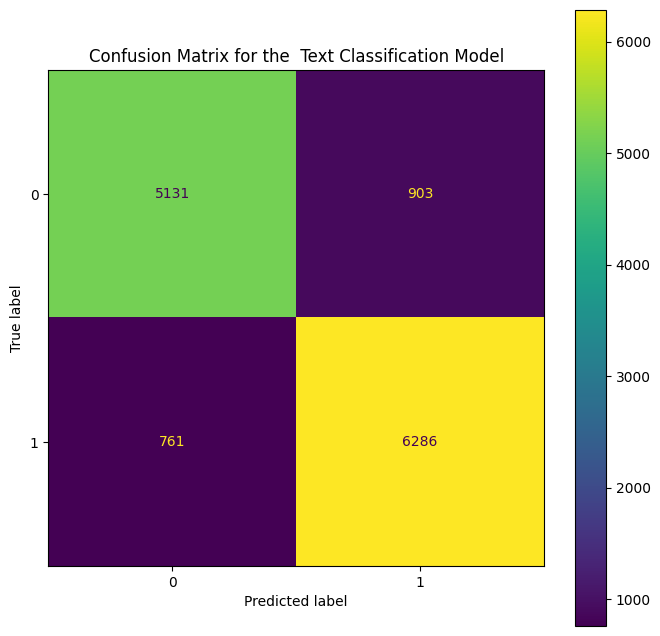

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(pipeline.predict(X_test),y_test)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['0','1']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the  Text Classification Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

In [38]:
import os

In [39]:
from joblib import dump

# # Save the trained pipeline
# dump(pipeline, 'text_classification_pipeline.joblib')

# Define the filename for saving the model
filename = 'text_classification_pipeline.joblib'

# Check if the file already exists
if not os.path.exists(filename):
    # Save the pipeline if the file does not exist
    dump(pipeline, filename)
    print(f'Model saved as {filename}')
else:
    print(f'File {filename} already exists. Model was not saved.')


Model saved as text_classification_pipeline.joblib


In [42]:
from joblib import load

# Load the saved pipeline
pipeline = load('text_classification_pipeline.joblib')

# Example text input
text_input = 'यो राम्रो उत्पादन हो'

# Make predictions
new_predictions = pipeline.predict([text_input])

# Print the predictions
print(new_predictions)


[1]


In [43]:
# Example text input
text_input = 'यसले मेरो छालामा नराम्रो असर गर्छ'

# Make predictions
new_predictions = pipeline.predict([text_input])

# Print the predictions
print(new_predictions)

[0]
